In [1]:
!pip install scikeras

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from imblearn.over_sampling import ADASYN
from google.colab import drive
drive.mount('/content/drive/')
import sys
sys.path.append('/content/drive/MyDrive')
from scikeras.wrappers import KerasClassifier

from binary_load import binary_load_dataset

from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers as Layer
from tensorflow.keras.metrics import Recall, Precision, BinaryAccuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
csv_loca = "star.csv"
TEST_SIZE = 0.2
VAL_SIZE = 0.2
RANDOM_STATE = 42

In [11]:
def modelling(nodes1 = 8, nodes2= 6, nodes3 = 4, drop_rate= 0.2, activation= 'relu'):
  # 모델 만들기
  # 뉴런의 개수는 input과 output 사이의 숫자를 넣으라고 한다. --> 사용, 왜냐하면 시간이 적게 걸려서
  # 뉴런의 개수는 input의 2/3 정도 넣라고 한다.
  # 뉴런의 개수는 input의 두배보다는 적게 넣라고 한다.

  model = Sequential([Layer.Dense(12, input_shape=(8,))])
  model.add(Layer.Dense(nodes1, activation = activation))
  model.add(Layer.BatchNormalization())
  model.add(Layer.Dropout(drop_rate))

  model.add(Layer.Dense(nodes2, activation = activation))
  model.add(Layer.BatchNormalization())
  model.add(Layer.Dropout(drop_rate))

  model.add(Layer.Dense(nodes3, activation = activation))
  model.add(Layer.BatchNormalization())
  model.add(Layer.Dropout(drop_rate))

  model.add(Layer.Dense(1, activation = 'sigmoid'))

  metrics = [
      TruePositives(name = 'tp'),
      TrueNegatives(name = 'tn'),
      FalsePositives(name = 'fp'),
      FalseNegatives(name = 'fn'),
      Recall(name = 'recall'),
      Precision(name = 'precision'),
      BinaryAccuracy(name = 'binary accuracy') # Binary Accuracy를 사용 안 하는 이유는 accuracy가 자동적으로 Binary Accuracy로 compile할 때 바꾸기 때문.
  ]

  model.compile(optimizer = 'adam',
                loss='binary_crossentropy',
                metrics = metrics)

  return model

In [12]:
X_train, X_val, X_test, y_train, y_val, y_test = binary_load_dataset(csv_loca, TEST_SIZE, VAL_SIZE, RANDOM_STATE)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((11454, 8), (11454,), (2864, 8), (2864,), (3580, 8), (3580,))

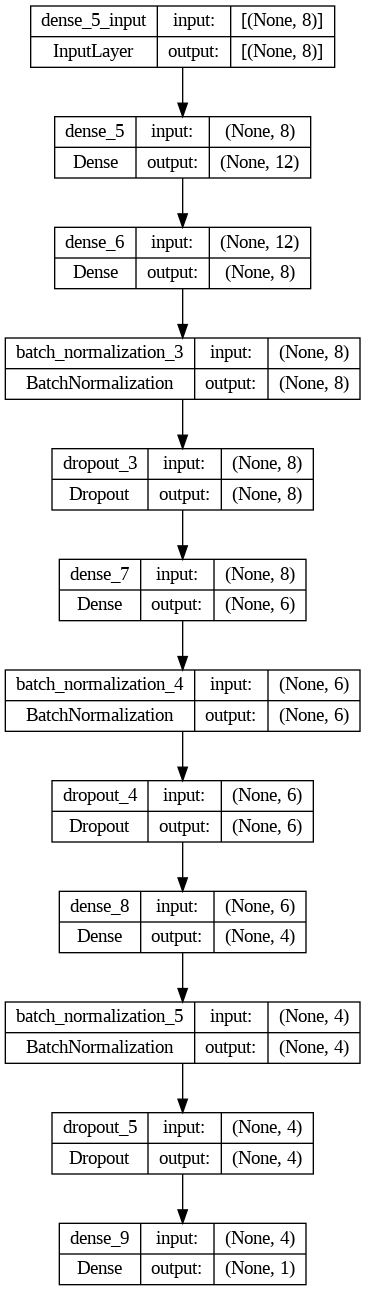

In [13]:
model = modelling()
keras.utils.plot_model(model, show_shapes=True)

In [20]:
model.fit(X_train, y_train, batch_size= 1000, epochs= 1000,  validation_data=(X_val, y_val))


model.evaluate(X_test, y_test, verbose=2)

Epoch 1/1000
12/12 [==============================] - 1s 60ms/step - loss: 0.1190 - tp: 736.0000 - tn: 10359.0000 - fp: 46.0000 - fn: 313.0000 - recall: 0.7016 - precision: 0.9412 - binary accuracy: 0.9687 - val_loss: 0.0966 - val_tp: 212.0000 - val_tn: 2583.0000 - val_fp: 19.0000 - val_fn: 50.0000 - val_recall: 0.8092 - val_precision: 0.9177 - val_binary accuracy: 0.9759
Epoch 2/1000
12/12 [==============================] - 0s 39ms/step - loss: 0.1182 - tp: 759.0000 - tn: 10349.0000 - fp: 56.0000 - fn: 290.0000 - recall: 0.7235 - precision: 0.9313 - binary accuracy: 0.9698 - val_loss: 0.1120 - val_tp: 228.0000 - val_tn: 2562.0000 - val_fp: 40.0000 - val_fn: 34.0000 - val_recall: 0.8702 - val_precision: 0.8507 - val_binary accuracy: 0.9742
Epoch 3/1000
12/12 [==============================] - 0s 27ms/step - loss: 0.1199 - tp: 772.0000 - tn: 10324.0000 - fp: 81.0000 - fn: 277.0000 - recall: 0.7359 - precision: 0.9050 - binary accuracy: 0.9687 - val_loss: 0.1146 - val_tp: 229.0000 - val_

[0.08132930845022202,
 296.0,
 3208.0,
 44.0,
 32.0,
 0.9024389982223511,
 0.8705882430076599,
 0.9787709712982178]

In [21]:
y_test_pred = model.predict(X_test)

y_test_pred = (y_test_pred > 0.5).astype(np.float32)

112/112 [==============================] - 0s 2ms/step


In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

cm = pd.DataFrame(cm)
cm.columns = ['Predicted 0', 'Predicted 1']
cm.rename(index={0: "True 0", 1: "True 1"}, inplace = True)
cm

,Predicted 0,Predicted 1
True 0,3208,44
True 1,32,296


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3252
           1       0.87      0.90      0.89       328

    accuracy                           0.98      3580
   macro avg       0.93      0.94      0.94      3580
weighted avg       0.98      0.98      0.98      3580

